In [192]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import numpy as np
import re #to extract substrings
import os #to use os.listdir

### Preliminary work: Merging 12 monts of sales into one data frame

In [195]:
# My solution
Sales_January_2019 = pd.read_csv("Sales_Data\Sales_January_2019.csv")
Sales_February_2019 = pd.read_csv("Sales_Data\Sales_February_2019.csv")
Sales_March_2019 = pd.read_csv("Sales_Data\Sales_March_2019.csv")
Sales_April_2019 = pd.read_csv("Sales_Data\Sales_April_2019.csv")
Sales_May_2019 = pd.read_csv("Sales_Data\Sales_May_2019.csv")
Sales_June_2019 = pd.read_csv("Sales_Data\Sales_June_2019.csv")
Sales_July_2019 = pd.read_csv("Sales_Data\Sales_July_2019.csv")
Sales_August_2019 = pd.read_csv("Sales_Data\Sales_August_2019.csv")
Sales_September_2019 = pd.read_csv("Sales_Data\Sales_September_2019.csv")
Sales_October_2019 = pd.read_csv("Sales_Data\Sales_October_2019.csv")
Sales_November_2019 = pd.read_csv("Sales_Data\Sales_November_2019.csv")
Sales_December_2019 = pd.read_csv("Sales_Data\Sales_December_2019.csv")

Sales_Year2019 = pd.concat([
    Sales_January_2019, 
    Sales_February_2019, 
    Sales_March_2019,
    Sales_April_2019,
    Sales_May_2019,
    Sales_June_2019,
    Sales_July_2019,
    Sales_August_2019,
    Sales_September_2019,
    Sales_October_2019,
    Sales_November_2019,
    Sales_December_2019
])

# ---------------------------------------------------
# THE solution: much more concise...
files = [file for file in os.listdir("./Sales_Data")]# good use of relative path..

all_months_data = pd.DataFrame() #Declaration of a Dataframe of variable size...

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [196]:
print("My solution: # of lines "+str(Sales_Year2019.shape[0])+ "; # of columns "+str(Sales_Year2019.shape[0]))
print("THE solution: # of lines "+str(all_months_data.shape[0])+ "; # of columns "+str(all_months_data.shape[0]))

#THE solution is much more concise, but mine works too!

My solution: # of lines 186850; # of columns 186850
THE solution: # of lines 186850; # of columns 186850


In [197]:
all_months_data.to_csv("./csv_exports/all_data.csv", index = False)
all_data = pd.read_csv("./csv_exports/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Question 1: What was the best month for sales? How much was earned that month?

In [198]:
# first step: move all the data in a df we'll use/modify for this first analysis
df = all_data

# step 2: clean df, cause it contains a loooot of things that needs to be cleansed...
# 2.1: remove the empty rows
df = df.dropna(how='all')
# 2.2: remove the rows containing ['Order ID', 'Product', 'Quantitiy Ordered', ....]
df = df.drop(df[df["Order ID"] == "Order ID"].index)
# 2.3: convert to float, the values we're going to work with
df["Quantity Ordered"] = df["Quantity Ordered"].astype('float')
df["Price Each"] = df["Price Each"].astype('float')
# 2.4: Get the revenue by multiplying Quantity Ordered & Price Each
df["Total Revenue"] = df["Quantity Ordered"].multiply(df["Price Each"], fill_value=0)
# 2.5: Convert the "order date" column to a dateformat. Then store the month
# https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior
df['Order Date']=pd.to_datetime(df['Order Date'], format="%m/%d/%y %H:%M")
df['Order Date Month'] = df['Order Date'].dt.month
# Final Step: group by Month and sort by descending to get the best month on top
best_month = pd.Series(df.groupby(["Order Date Month"])["Total Revenue"].sum())
best_month.sort_values(ascending=False).head(1)

# df.to_csv("./Sales_Data/to_csv_exports/all_data_cleansed.csv")
# df.head()
# df.dtypes

# unformated_date = "04/19/19 08:46"    
# print( datetime.datetime.strptime(unformated_date, "%m/%d/%y %I:%M").strftime('%y-%m-%d') )

#-------------------------------------------------
# String values in the Quantity Ordered column that need to be removed
# df["Quantity Ordered"][df["Quantity Ordered"].values == "Quantity Ordered"]



# df["Quantity Ordered"].loc[0:] = df["Quantity Ordered"].loc[0:].astype('float')
#step 3: remove the header row to prepare the conversion
# df["Quantity Ordered"] = df["2"][df["2"].values != "Quantity Ordered"].astype('float',errors='ignore')
# df["Quantity Orderer"] = df["2"][df["2"].values != "Quantity Ordered"].astype('float',errors='ignore')


# df["Quantity Ordered"].multiply(df["Quantity Ordered"], fill_value=0)
# df["Quantity Ordered"].astype('int')
# df["Quantity Ordered"] = df["Quantity Ordered"].dropna()
# df["Quantity Ordered"][df["Quantity Ordered"].isnull() == True]

Order Date Month
12    4.613443e+06
Name: Total Revenue, dtype: float64

### My Answer to Q1: the best month is December, with a revenue of approximately 4613443 usd... 
- As you can see, there still needs to be a little bit of formatting to the data in the revenue columns, but for now, let's not touch it, as it's gonna be easier to manipulate as float... (but in case you'd like to try later, here's a link to do so: https://stackoverflow.com/questions/35019156/pandas-format-column-as-currency)
- I'm just going to export the cleansed version of all_data...

In [199]:
df.to_csv("./csv_exports/all_data_cleansed_w_month.csv")

### THE answer to Q1: I actually found the same result, in a cleaner way I feel like...
so this time, no need to copy the solution for this question. Let's follow the video and plot the barchart of the sales througout the year...

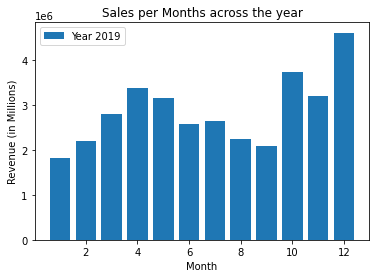

In [200]:
# step 1: create an "array" with numbers from 1 to 12
# months = range(1,13)
# months[11]
# plt.bar(months, re)



months = np.arange(start=1, stop=13, step=1)
plt.bar(months, best_month, label= 'Year 2019')
plt.title("Sales per Months across the year")
plt.xlabel("Month")
plt.ylabel("Revenue (in Millions)")
plt.legend()
plt.show()


### Question 2: What city had the highest number of sales?

In [201]:
# We want to create a new field, that'll contain the State information
# step 1: from the "Purchase Address" column, extract the city info (city suffix will be enough here...)
df["State Initials"] = df['Purchase Address'].str[-8:-6]

# step 2: group by again (by "city initials")
best_city = pd.Series(df.groupby(["State Initials"])["Total Revenue"].sum())
best_city.sort_values(ascending=False).head(1)


State Initials
CA    1.371477e+07
Name: Total Revenue, dtype: float64

### My Answer to Q2: the best city is California, with a revenue of approximately 1.3 Million usd... 
- like before, we could arrange the data, so that the display is in clean USD...
- but for now, I'm just going to export again these data

In [203]:
df.to_csv("./csv_exports/all_data_cleansed_w_States.csv")

### THE answer: is pretty interesting because it's using a lambda fct in the .apply method
- Plus I'm actually using states insted of cities like it was asked, I'm renaming/modifying what needs to be monified and let's continue

In [204]:
# We want to create a new field, that'll contain the city information
# step 1: from the "Purchase Address" column, extract the city info (city suffix will be enough here...)
# regexPattern is the regular expression that says, give me Boston in this string "xx, Boston, xxx"
df["City"] = df['Purchase Address']
regexPattern = ",\ (.*?)\, "
# Create a function that's going to extract the city information
def extractCity(Xseries, Yseries, regexPattern):
    for x in Xseries:
        substring = re.search(pattern, x).group(1)
        Yseries.append(substring)
    return Yseries

Yseries = []
Yseries = extractCity(df["City"], Yseries, pattern)

# Affect the city values in df
df["City"] = Yseries


# step 2: group by again (by "city initials")
best_city = pd.Series(df.groupby(["City"])["Total Revenue"].sum())
best_city.sort_values(ascending=False).head(1)

City
San Francisco    8.262204e+06
Name: Total Revenue, dtype: float64

###  I end up with the same answer as the solution: 
- San Fransisco is the city with the best sales
- Again, I'm exporting this new version of my dataset
- And I'm plotting the whole thing

In [206]:
df.to_csv("./csv_exports/all_data_cleansed_w_Cities.csv")

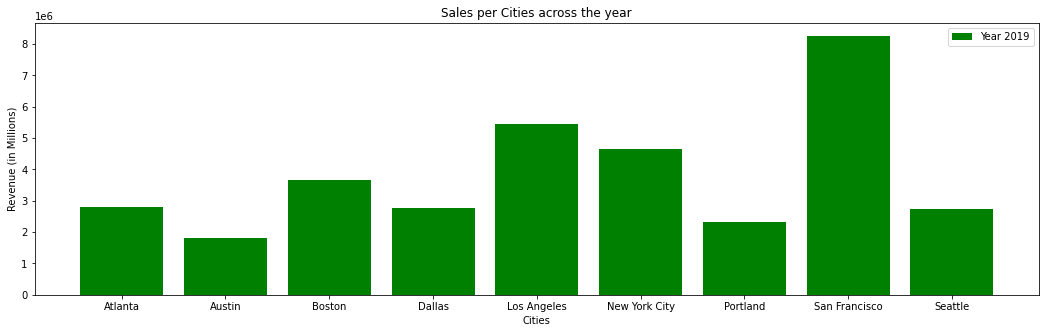

In [227]:
best_city.index
best_city.values
f, ax = plt.subplots(figsize=(18,5)) #to set up the size of the figure
plt.bar(best_city.index, best_city.values, label= 'Year 2019', color = "green")
plt.title("Sales per Cities across the year")
plt.xlabel("Cities")
plt.ylabel("Revenue (in Millions)")
plt.legend()
plt.show()

# best_city = best_city.value_counts()
# best_city
# pd.Series(df.groupby(["City Initials"], as_index=False)["Total Revenue"].sum())
# best_city
# city = best_city.index
# city
# plt.bar(city, best_month, label= 'Year 2019')
# plt.title("Sales per Cities across the year")
# plt.xlabel("Cities")
# plt.ylabel("Revenue (in Millions)")
# plt.legend()
# plt.show()